In [ ]:
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve,KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc
from scipy import stats


In [ ]:
import xgboost as xgb
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:

X_train_final=pd.read_csv("x_train.csv")
y=pd.read_csv("y_train.csv")

In [ ]:
X_train_final.drop(columns="Unnamed: 0", inplace=True)
y.drop(columns="Unnamed: 0", inplace=True)

In [ ]:
X_train_discretise = pd.get_dummies( X, drop_first = True) 
        x_train, x_test, y_train, y_test = train_test_split(X_train_discretise , y.iloc[: ,1], stratify = y.iloc[: ,1] ) 

In [ ]:
from sklearn.metrics import roc_curve,confusion_matrix
import matplotlib.pyplot as plt 

def prepare_data_for_ML(X_train_final,y_train):
    
    X_train_dummies = pd.get_dummies(X_train_final, drop_first = True)
    x_train, x_test, y_train, y_test = train_test_split(X_train_dummies , y, stratify = y , test_size=0.2)
    return x_train, x_test, y_train, y_test

def evaluation(model,x_train,x_test,y_train,y_test):
    y_train_pred=model.predict_proba(x_train)
    y_train_pred = pd.DataFrame(y_train_pred).iloc[: , 1]
    y_test_pred=model.predict_proba(x_test)
    y_test_pred = pd.DataFrame(y_test_pred).iloc[: , 1]
    score_auc_train = sklearn.metrics.roc_auc_score(y_train,y_train_pred )
    score_auc_test =  sklearn.metrics.roc_auc_score(y_test,y_test_pred)
    y_pred_class=model.predict(x_test)
    display(confusion_matrix(y_pred_class,y_test))
    print("score auc train ", score_auc_train)
    print("score auc test ", score_auc_test)
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred , pos_label = 1 )
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred , pos_label = 1 )
    plt.plot(fpr_train, tpr_train, label = f'auc_train {score_auc_train.round(2)}') 
    plt.plot(fpr_test, tpr_test, label = f'auc_test {score_auc_test.round(2)}') 
    plt.plot([0,1], [0,1])
    plt.title('auc')
    plt.xlabel('Taux faux positifs')
    plt.ylabel('Taux vrais positifs')
    plt.xlim([0,1])
    plt.ylim([0,1])


    

      


In [ ]:
x_train, x_test, y_train, y_test=prepare_data_for_ML(X_train_final,y)

In [ ]:

from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
kfold=StratifiedKFold(n_splits=5,shuffle=True)

In [ ]:
from sklearn.utils import class_weight
import numpy as np
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train.values.reshape(-1)
)

In [ ]:
import xgboost as xgb
boost=xgb.XGBClassifier(objective="binary:logistic")

param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

result= GridSearchCV(boost,param_grid,cv=kfold,n_jobs=-1,scoring="balanced_accuracy").fit(x_train,y_train)


KeyboardInterrupt: ignored

In [ ]:
result.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 3,
 'reg_lambda': 0,
 'scale_pos_weight': 1,
 'subsample': 0.8}

In [ ]:
params = {'colsample_bytree': 0.5,
 'gamma': 0,
 'learning_rate': 0.15,
 'min_child_weight':0.4,
 'max_depth': 4,
 'reg_lambda': 0.1,
 'scale_pos_weight': class_weight,
 'max_bin':5,
 #'subsample': 0.8
 }

boost=xgb.XGBClassifier(objective="binary:logistic",** params)
boost.fit(x_train,y_train)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.15, max_bin=5,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=4, max_leaves=0, min_child_weight=0.4, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

array([[13556,    88],
       [    0,     0]])

score auc train  0.6798347072871704
score auc test  0.5254026227903109


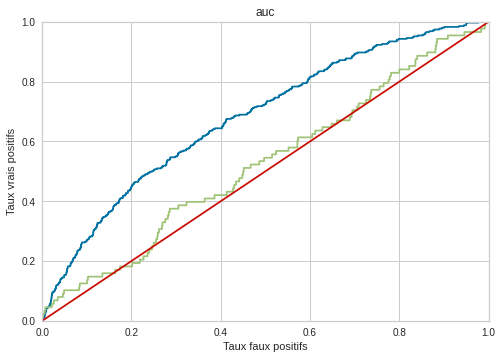

In [ ]:
import sklearn
evaluation(boost,x_train,x_test,y_train,y_test)


The Hyperparamer Tuning suggestions from LightGBM
-Deal with Over-fitting
-Use small max_bin
-Use small num_leaves
-Use min_data_in_leaf and min_sum_hessian_in_leaf
- Use bagging by set bagging_fraction and bagging_freq
- Use feature sub-sampling by set feature_fraction
- Use bigger training data
- Try lambda_l1, lambda_l2 and min_gain_to_split for regularization
- Try max_depth to avoid growing deep tree
- Try extra_trees
- Try increasing path_smooth

In [ ]:
import lightgbm as lgb
param={'boosting_type': 'dart',
 'colsample_bytree': 0.4,
 'learning_rate': 0.055,
 'max_depth': 3,
 'min_child_weight': 6,
 'min_data_in_leaf': 650,
 'n_estimators': 1000,
 'random_state': 42,
 'is_unbalance':True,
 'n_jobs': -1,
 'early_stopping_round':50,
 'max_bin':10,
 'lambdarank_norm':True,
 }


In [ ]:

param = {
        'boosting_type': 'dart',
        'objective': 'binary',
        'metric':'auc',
        'learning_rate':0.055,
        #'is_unbalance': 'true',  #because training data is unbalance (replaced with scale_pos_weight)
        'num_leaves': 31,  # we should let it be smaller than 2^(max_depth)
        'max_depth': 3,  # -1 means no limit
        'min_child_samples': 20,  # Minimum number of data need in a child(min_data_in_leaf)
        'max_bin': 10,  # Number of bucketed bin for feature values
        'subsample_freq': 0,  # frequence of subsample, <=0 means no enable
        'colsample_bytree': 0.4,  # Subsample ratio of columns when constructing each tree.
        'min_child_weight': 5,  # Minimum sum of instance weight(hessian) needed in a child(leaf)
        'min_split_gain': 0,  # lambda_l1, lambda_l2 and min_gain_to_split to regularization
        'reg_alpha': 0,  # L1 regularization term on weights
        'reg_lambda': 10,  # L2 regularization term on weights
        'nthread': 4,
        'verbose': 0,
         'is_unbalanced':True,
    }

In [ ]:
list_params_to_plot=['min_split_gain','reg_lambda','reg_alpha','boosting_type','min_child_weight','num_leaves','min_child_samples','colsample_bytree']

In [ ]:
model=lgb.LGBMClassifier(is_unbalanced=True, objective='binary',metric='auc',max_depth=3,learning_rate=0.03)

In [ ]:
model.fit(x_train,y_train.values.reshape(-1))

LGBMClassifier(is_unbalanced=True, learning_rate=0.03, max_depth=3,
               metric='auc', objective='binary')

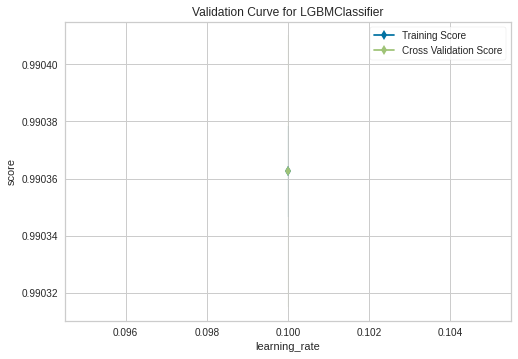

In [ ]:
from yellowbrick.model_selection import ValidationCurve
cv = StratifiedKFold(4)

viz=ValidationCurve(model, param_name="learning_rate", n_jobs=-1,
      param_range=[0,0.1], cv=cv, scoring="f1_weighted")

viz.fit(x_train, y_train)
viz.show()


In [ ]:
import optuna
#modules for model training and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [ ]:
classifiers = {
    "KNN": KNeighborsClassifier(), 
    "LR": LogisticRegression(max_iter=1000), 
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
    "SVM": SVC(),
    "MLP": MLPClassifier(max_iter=1000),
    "XGB": XGBClassifier(),
    "LGBM": LGBMClassifier()
}

#training all the models in the dictionary through cross_validate
results = pd.DataFrame(columns=["Classifier", "Avg_Accuracy", "Avg_F1_Score"])
cv=StratifiedKFold(4)
for name, clf in classifiers.items():
    model = clf
    cv_results = cross_validate(
        model, x_train, y_train, cv=cv,
        scoring= (['accuracy','f1'])
    )

    #appending results in the result dataframe
    results = results.append({
        "Classifier": name,
        "Avg_Accuracy": cv_results['test_accuracy'].mean(),
        "Avg_F1_Score": cv_results['test_f1'].mean()
    }, ignore_index=True)
        
results = results.sort_values("Avg_F1_Score", ascending=False)
results

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

,Classifier,Avg_Accuracy,Avg_F1_Score
5,MLP,0.991589,0.004098
0,KNN,0.993531,0.000000
1,LR,0.993550,0.000000
2,DT,0.984223,0.000000
3,RF,0.993568,0.000000
4,SVM,0.993568,0.000000
6,XGB,0.993568,0.000000
7,LGBM,0.993550,0.000000


In [ ]:
#normalizing time and amount features
scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
classifiers = {
    "KNN": KNeighborsClassifier(), 
    "LR": LogisticRegression(max_iter=1000), 
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
    "SVM": SVC(),
    "MLP": MLPClassifier(max_iter=1000),
    "XGB": XGBClassifier(),
    "LGBM": LGBMClassifier()
}

#training all the models in the dictionary through cross_validate
results = pd.DataFrame(columns=["Classifier", "Avg_Accuracy", "Avg_F1_Score"])
cv=StratifiedKFold(4)
for name, clf in classifiers.items():
    model = clf
    cv_results = cross_validate(
        model, x_train, y_train, cv=cv,
        scoring= (['accuracy','f1'])
    )

    #appending results in the result dataframe
    results = results.append({
        "Classifier": name,
        "Avg_Accuracy": cv_results['test_accuracy'].mean(),
        "Avg_F1_Score": cv_results['test_f1'].mean()
    }, ignore_index=True)
        
results = results.sort_values("Avg_F1_Score", ascending=False)
results

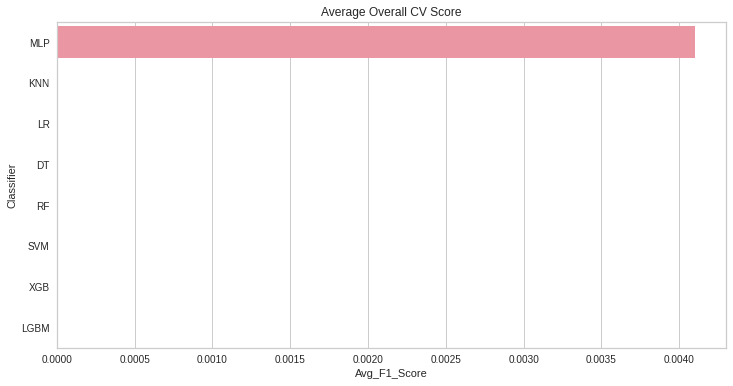

In [ ]:
#Lets visualize the results 
plt.figure(figsize=(12, 6))
sns.barplot(data=results, x="Avg_F1_Score", y="Classifier")
plt.title("Average Overall CV Score")
plt.show()

In [ ]:
#Defining the objective function for optuna
def objective(trial, x, y):
    # the parameters grid
    param_grid = { 
        "n_estimators": trial.suggest_int('n_estimators', 100, 1000),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "num_leaves": trial.suggest_int("num_leaves", 20, 3000, step=20),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        'min_child_weight': trial.suggest_loguniform('min_child_weight',1e-10, 1e10),
        "min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        'scale_pos_weight':class_weight,
        }  
    model = LGBMClassifier(objective="binary",**param_grid)
    cv_results = cross_validate(
        model, x, y_train, cv=10,
        scoring= (['accuracy','f1'])
    )
    return cv_results['test_f1'].mean()

In [ ]:
#creating an optuna study
import optuna 
optuna.logging.set_verbosity(optuna.logging.WARNING) #suppresses the verbose
study = optuna.create_study(direction='maximize', study_name='LGBM Classifier')
func = lambda trial: objective(trial,x_train,y_train.values.reshape(-1))
study.optimize(func, n_trials=2)

In [ ]:
print(f"Best F1-Score {study.best_value:.5f}: ")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")

In [ ]:
pip install optuna


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 348 kB 5.3 MB/s 
     |████████████████████████████████| 209 kB 70.8 MB/s 
     |████████████████████████████████| 81 kB 8.1 MB/s 
     |████████████████████████████████| 78 kB 7.6 MB/s 
     |████████████████████████████████| 50 kB 5.7 MB/s 
     |████████████████████████████████| 147 kB 59.1 MB/s 
     |████████████████████████████████| 112 kB 60.5 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=341e8f3be09f0211fa2bff9b9d3f1b876e37c68bae8d4e1a2660aa0bb9ba828c
  Stored in directory: /root/.cache/pip/wheels/7f/1a/65/84ff8c386bec21fca6d220ea1f5498a0367883a78dd5ba6122
Successfully built pyperclip
